In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import roc_auc_score

%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
file=r"E:\Jaison\Cource Meterials\Python\ML\Data\census_income.csv"
ci_train=pd.read_csv(file)

In [3]:
ci_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
pd.crosstab(ci_train['education'],ci_train['education.num'])

education.num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


In [5]:
ci_train.drop(['education'],axis=1,inplace=True)

In [6]:
ci_train.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Y
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
ci_train['Y'].value_counts()

 <=50K    24720
 >50K      7841
Name: Y, dtype: int64

In [8]:
ci_train['Y']=(ci_train['Y']==' >50K').astype(int)

In [9]:
cat_cols=ci_train.select_dtypes(['object']).columns

In [10]:
cat_cols

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object')

In [11]:
ci_train.shape

(32561, 14)

In [12]:

#checking the frequency of values 

In [13]:
for col in cat_cols:
    freqs=ci_train[col].value_counts()
    print(freqs)
    k=freqs.index[freqs>500][:-1]
    #print (k)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital.status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64
 Husband           13193
 Not-in

In [14]:
for col in cat_cols:
    freqs=ci_train[col].value_counts()
    k=freqs.index[freqs>500][:-1]
    for cat in k:
        name=col+'_'+cat
        ci_train[name]=(ci_train[col]==cat).astype(int)
    del ci_train[col]
    print (col)

workclass
marital.status
occupation
relationship
race
sex
native.country


In [15]:
ci_train.shape

(32561, 39)

In [16]:
ci_train.isnull().sum()

age                                   0
fnlwgt                                0
education.num                         0
capital.gain                          0
capital.loss                          0
hours.per.week                        0
Y                                     0
workclass_ Private                    0
workclass_ Self-emp-not-inc           0
workclass_ Local-gov                  0
workclass_ ?                          0
workclass_ State-gov                  0
workclass_ Self-emp-inc               0
marital.status_ Married-civ-spouse    0
marital.status_ Never-married         0
marital.status_ Divorced              0
marital.status_ Separated             0
occupation_ Prof-specialty            0
occupation_ Craft-repair              0
occupation_ Exec-managerial           0
occupation_ Adm-clerical              0
occupation_ Sales                     0
occupation_ Other-service             0
occupation_ Machine-op-inspct         0
occupation_ ?                         0


In [18]:
ci_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,Y,workclass_ Private,workclass_ Self-emp-not-inc,workclass_ Local-gov,...,relationship_ Husband,relationship_ Not-in-family,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ White,race_ Black,sex_ Male,native.country_ United-States,native.country_ Mexico
0,39,77516,13,2174,0,40,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
1,50,83311,13,0,0,13,0,0,1,0,...,1,0,0,0,0,1,0,1,1,0
2,38,215646,9,0,0,40,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
3,53,234721,7,0,0,40,0,1,0,0,...,1,0,0,0,0,0,1,1,1,0
4,28,338409,13,0,0,40,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [19]:
x_train=ci_train.drop(['Y'],1)
y_train=ci_train['Y']

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:
#criterion:- either 'entropy' or 'gini'
#max_depth:- None - expand until all leaf node node contain minimum min_samples_split samples
#min_samples_split:- minimum number of samples required to split the sample (recomended value is 5-10)
#min_sample_leaf:-minimum number of samples required to be at the leaf node
#max_leaf_node:-size of the tree
#class weight:-None means each class given equal weight(balanced - for classification problems)
#random_state-:to reproduce random result

In [ ]:
# Decision Tree - For Classification model

In [127]:
params={'class_weight':[None,'balanced'],
       'criterion':['entropy','gini'],
       'max_depth':[None,5,10,15,20,30,50,70],
           'min_samples_leaf':[1,2,5,10,15,20],
           'min_samples_split':[2,5,10,15,20]
       }

In [128]:
2*2*8*6*5 #combinations are possible hear  

960

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
cif=DecisionTreeClassifier()

In [131]:
# n_iter -:out of 960 possiblities we need to try 10,100,200,300,500 etc..
# we can use either grid search or random search approach 

In [137]:
random_search=RandomizedSearchCV(cif,cv=10,
                                param_distributions=params,
                                scoring='roc_auc',
                                n_iter=500
                                )

In [141]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=500, n_jobs=1,
          param_distributions={'class_weight': [None, 'balanced'], 'criterion': ['entropy', 'gini'], 'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [142]:
random_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [143]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0:3f}(std:{1:.5f})'.format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print('parameters: {0}'.format(results['params'][candidate]))
            print('')

In [136]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.905191(std:0.00505)
parameters: {'min_samples_split': 20, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'gini', 'class_weight': None}

Model with rank: 2
Mean validation score: 0.905025(std:0.00449)
parameters: {'min_samples_split': 5, 'min_samples_leaf': 15, 'max_depth': 10, 'criterion': 'gini', 'class_weight': None}

Model with rank: 3
Mean validation score: 0.904735(std:0.00514)
parameters: {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'gini', 'class_weight': None}

Model with rank: 4
Mean validation score: 0.903805(std:0.00392)
parameters: {'min_samples_split': 5, 'min_samples_leaf': 15, 'max_depth': 10, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 5
Mean validation score: 0.903804(std:0.00391)
parameters: {'min_samples_split': 2, 'min_samples_leaf': 15, 'max_depth': 10, 'criterion': 'entropy', 'class_weight': None}



In [144]:
dtree=random_search.best_estimator_

In [145]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [146]:
dotfile=open('mytree.dot','w')
tree.export_graphviz(dtree,out_file=dotfile,
                    feature_names=x_train.columns,
                    class_names=['0','1'],
                    proportion=True)
dotfile.close()

In [ ]:
# RandomForest for Classification moodel

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
cif=RandomForestClassifier(verbose=1,n_jobs=-1)

In [150]:
params_dist={'n_estimators':[100,200,300,500,700,1000],
             'max_features':[5,10,20,25,30,35],
             'bootstrap':[True, False],
        'class_weight':[None,'balanced'],
       'criterion':['entropy','gini'],
       'max_depth':[None,5,10,15,20,30,50,70],
           'min_samples_leaf':[1,2,5,10,15,20],
           'min_samples_split':[2,5,10,15,20]
       }

In [151]:
x_train.shape

(32561, 38)

In [153]:
# Max_features should not be more than 38
# we are looking for 69120 combinations 
# Each random forest  can have min: 100 and max:1000 decision trees(n_estimators)


In [157]:
(960*6*6*2)

69120

In [158]:
n_iter_search=10
random_search=RandomizedSearchCV(cif,cv=5,
                                param_distributions=params_dist,
                                scoring='roc_auc',
                                n_iter=n_iter_search
                                )

In [159]:
random_search.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    8.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  42 tas

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   26.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | e

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 300 out o

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   47.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | ela

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 500, 700, 1000], 'max_features': [5, 10, 20, 25, 30, 35], 'bootstrap': [True, False], 'class_weight': [None, 'balanced'], 'criterion': ['entropy', 'gini'], 'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn'

In [160]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.919140(std:0.00313)
parameters: {'n_estimators': 1000, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 10, 'max_depth': 50, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.917161(std:0.00363)
parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 20, 'max_depth': 15, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.916421(std:0.00309)
parameters: {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 25, 'max_depth': 10, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.915798(std:0.00357)
parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 20, 'max_depth': 50, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': Tr

In [162]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=50, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=1, warm_start=False)

In [163]:
rf=random_search.best_estimator_

In [164]:
rf.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   58.5s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=50, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=1, warm_start=False)

In [ ]:
#feature Importance 

In [165]:
feat_imp_df=pd.DataFrame({'features':x_train.columns,'importance':rf.feature_importances_})
feat_imp_df.sort_values('importance',ascending=False)

,features,importance
12,marital.status_ Married-civ-spouse,0.155939
2,education.num,0.131692
3,capital.gain,0.122268
0,age,0.121832
28,relationship_ Husband,0.081393
1,fnlwgt,0.064378
5,hours.per.week,0.063471
13,marital.status_ Never-married,0.045877
4,capital.loss,0.030009
32,relationship_ Wife,0.018419


In [ ]:
#Partial dependence ploat 

In [197]:
var_name='age'
preds=rf.predict_proba(x_train)[:,1]

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    6.0s finished


In [198]:
var_data=pd.DataFrame({'var':x_train[var_name],'response':preds})

In [199]:
import seaborn as sns

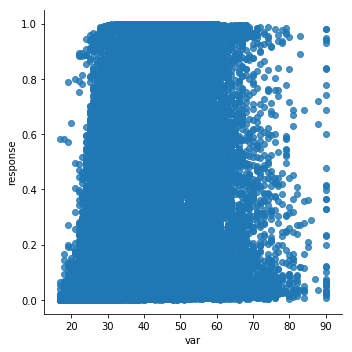

In [200]:
sns.lmplot(x='var',y='response',data=var_data,fit_reg=False)

In [201]:
import statsmodels.api as sm

In [202]:
smooth_data=sm.nonparametric.lowess(var_data['response'],var_data['var'])

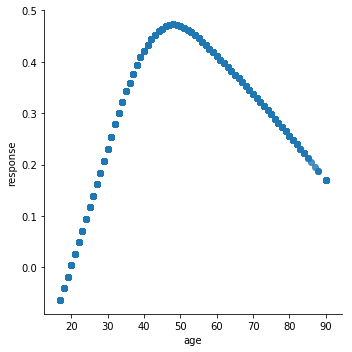

In [203]:
df=pd.DataFrame({'response':smooth_data[:,1],var_name:smooth_data[:,0]})
sns.lmplot(x=var_name,y='response',data=df,fit_reg=False)

In [ ]:
# Dicision Tree - for Rigression model

In [21]:
params={'max_depth':[None,5,10,15,20,30,50,70],
           'min_samples_leaf':[1,2,5,10,15,20],
           'min_samples_split':[2,5,10,15,20]
       }

In [23]:
8*6*5 #combinations are possible hear  

240

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
cif=DecisionTreeRegressor()

In [131]:
# n_iter -:out of 960 possiblities we need to try 10,100,200,300,500 etc..
# we can use either grid search or random search approach 

In [29]:
random_search=RandomizedSearchCV(cif,cv=10,
                                param_distributions=params,
                                scoring='neg_mean_absolute_error',
                                n_iter=200,n_jobs=-1,verbose=20
                                )

In [30]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.7s
[Paralle

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 151 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   44.1s
[Paralle

[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:  1.3min
[Paralle

[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 415 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 417 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 419 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 420 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 421 tasks      | elapsed:  1.8min
[Paralle

[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 549 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 550 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 551 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 553 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:  2.3min
[Paralle

[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 681 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 683 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 684 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 685 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 686 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 687 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 689 tasks      | elapsed:  2.8min
[Paralle

[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 813 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 815 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 819 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 820 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 821 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 822 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 823 tasks      | elapsed:  3.3min
[Paralle

[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 942 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 947 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 949 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 950 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 951 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 953 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 954 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 955 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:  3.9min
[Paralle

[Parallel(n_jobs=-1)]: Done 1073 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1074 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1075 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1077 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1079 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1082 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1083 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1084 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1085 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1086 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1087 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1205 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1206 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1207 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1208 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1209 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1210 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1211 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1212 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1213 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1214 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1215 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1216 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1217 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1219 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1220 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1337 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1338 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1339 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1340 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1341 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1342 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1343 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1344 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1345 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1346 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1347 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1348 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1349 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1350 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1351 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1352 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1469 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1471 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1472 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1473 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1474 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1475 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1476 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1477 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1478 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1479 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1480 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1481 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1482 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1483 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1484 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1601 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1602 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1603 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1604 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1605 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1606 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1607 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1608 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1609 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1610 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1611 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1612 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1613 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1614 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1615 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1733 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1734 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1735 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1737 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1738 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1739 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1740 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1741 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1742 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1743 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1744 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1745 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1746 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1747 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1748 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1865 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1866 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1867 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1868 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1869 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1870 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1871 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1872 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1873 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1874 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1875 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1876 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1877 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1878 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1879 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1880 tasks      | elapsed: 

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=20)

In [31]:
random_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [32]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0:3f}(std:{1:.5f})'.format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print('parameters: {0}'.format(results['params'][candidate]))
            print('')

In [33]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -0.181139(std:0.00471)
parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}

Model with rank: 2
Mean validation score: -0.181862(std:0.00413)
parameters: {'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': None}

Model with rank: 3
Mean validation score: -0.181915(std:0.00357)
parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}

Model with rank: 4
Mean validation score: -0.182153(std:0.00428)
parameters: {'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': 50}

Model with rank: 5
Mean validation score: -0.182202(std:0.00486)
parameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 70}



In [34]:
dtree=random_search.best_estimator_

In [35]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [36]:
dotfile=open('mytree.dot','w')
tree.export_graphviz(dtree,out_file=dotfile,
                    feature_names=x_train.columns,
                    class_names=['0','1'],
                    proportion=True)
dotfile.close()

In [ ]:
# RandomForest - for classification model 

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
cif=RandomForestClassifier(verbose=1,n_jobs=-1)

In [150]:
params_dist={'n_estimators':[100,200,300,500,700,1000],
             'max_features':[5,10,20,25,30,35],
             'bootstrap':[True, False],
        'class_weight':[None,'balanced'],
       'criterion':['entropy','gini'],
       'max_depth':[None,5,10,15,20,30,50,70],
           'min_samples_leaf':[1,2,5,10,15,20],
           'min_samples_split':[2,5,10,15,20]
       }

In [151]:
x_train.shape

(32561, 38)

In [153]:
# Max_features should not be more than 38
# we are looking for 69120 combinations 
# Each random forest  can have min: 100 and max:1000 decision trees(n_estimators)


In [157]:
(960*6*6*2)

69120

In [158]:
n_iter_search=10
random_search=RandomizedSearchCV(cif,cv=5,
                                param_distributions=params_dist,
                                scoring='roc_auc',
                                n_iter=n_iter_search
                                )

In [159]:
random_search.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    8.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  42 tas

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   26.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | e

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 300 out o

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   47.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | ela

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 500, 700, 1000], 'max_features': [5, 10, 20, 25, 30, 35], 'bootstrap': [True, False], 'class_weight': [None, 'balanced'], 'criterion': ['entropy', 'gini'], 'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn'

In [160]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.919140(std:0.00313)
parameters: {'n_estimators': 1000, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 10, 'max_depth': 50, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.917161(std:0.00363)
parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 20, 'max_depth': 15, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.916421(std:0.00309)
parameters: {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 25, 'max_depth': 10, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.915798(std:0.00357)
parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 20, 'max_depth': 50, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': Tr

In [162]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=50, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=1, warm_start=False)

In [163]:
rf=random_search.best_estimator_

In [164]:
rf.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   58.5s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=50, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=1, warm_start=False)

In [ ]:
#feature Importance 

In [165]:
feat_imp_df=pd.DataFrame({'features':x_train.columns,'importance':rf.feature_importances_})
feat_imp_df.sort_values('importance',ascending=False)

,features,importance
12,marital.status_ Married-civ-spouse,0.155939
2,education.num,0.131692
3,capital.gain,0.122268
0,age,0.121832
28,relationship_ Husband,0.081393
1,fnlwgt,0.064378
5,hours.per.week,0.063471
13,marital.status_ Never-married,0.045877
4,capital.loss,0.030009
32,relationship_ Wife,0.018419


In [ ]:
#Partial dependence ploat 

In [197]:
var_name='age'
preds=rf.predict_proba(x_train)[:,1]

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    6.0s finished


In [198]:
var_data=pd.DataFrame({'var':x_train[var_name],'response':preds})

In [199]:
import seaborn as sns

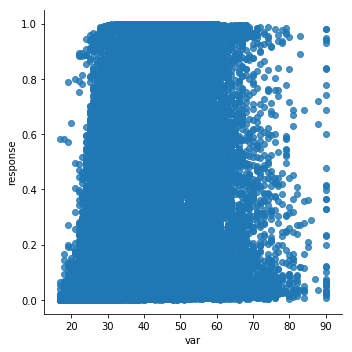

In [200]:
sns.lmplot(x='var',y='response',data=var_data,fit_reg=False)

In [201]:
import statsmodels.api as sm

In [202]:
smooth_data=sm.nonparametric.lowess(var_data['response'],var_data['var'])

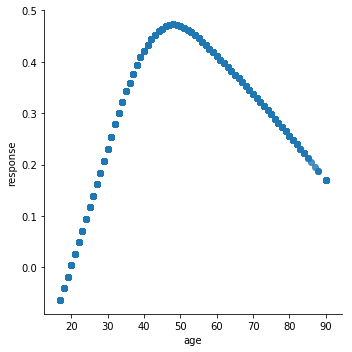

In [203]:
df=pd.DataFrame({'response':smooth_data[:,1],var_name:smooth_data[:,0]})
sns.lmplot(x=var_name,y='response',data=df,fit_reg=False)

In [ ]:
# for Rigression method